In [1]:
# import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# global constant
NUM_TRIAL = 100000
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

In [10]:
# Bandit class
class Bandit():
    
    def __init__(self, p):
        # initial state of the bandit before next pull
        # p : the win rate
        self.p = p
        self.p_estimate = 0 
        self.N = 0
        
    def __str__(self):
        return f"the mean of the bandit {self.p} is {self.p_estimate} and time play is {self.N}"
        
    def pull(self):
        # draw a 1 with the probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N = self.N + 1
        #self.p_estimate = (1-1/self.N)*self.p_estimate + x/self.N
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
        
def experiment():
    
    # initialize the 3 Bandits
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIAL)
    i=0

    # play each bandit one time
    for b in bandits:
        rewards[i] = b.pull()
        b.update(rewards[i])
        i += 1
    
    
    # the loop
    for i in range(3,NUM_TRIAL):
        
        # use UCB to select the next Bandit
        optimal_j = np.argmax([(b.p_estimate + np.sqrt(2*np.log(i)/b.N)) for b in bandits])
        
        # trigger the current bandit
        cur_bandit = bandits[optimal_j]
        rewards[i] = cur_bandit.pull()
        cur_bandit.update(rewards[i])
        
    for b in bandits:    
        print(b)
        
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIAL) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIAL)*np.max(BANDIT_PROBABILITIES))
    plt.show()
        
            

the mean of the bandit 0.2 is 0.20270270270270271 and time play is 74
the mean of the bandit 0.5 is 0.5226130653266334 and time play is 398
the mean of the bandit 0.75 is 0.74941724941726 and time play is 99528


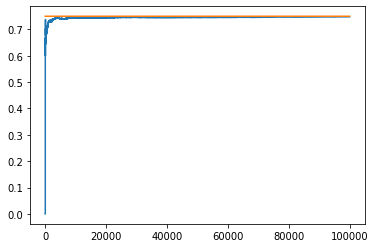

In [11]:
experiment()